<a href="https://colab.research.google.com/github/rajatpal00/Airline-passenger-referral-prediction/blob/main/Rajat_Pal_Capstone_Project_Airline_passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset discription
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.
Feature descriptions briefly as follows:
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review
* customer review: Review of the customers in free text format
 
* aircraft: Type of the aircraft
* traveller type: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight
* date flown: Flight date
* seat comfort: Rated between 1-5
* cabin service: Rated between 1-5
* food bev: Rated between 1-5
* entertainment: Rated between 1-5
* ground service: Rated between 1-5
* value for money: Rated between 1-5

##The main objective is to predict whether passengers will refer the airline to their friends.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
main_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/capstone project/Airline Passenger Referral Prediction/data_airline_reviews.xlsx') 

In [3]:
main_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
main_df.dropna(how='all',inplace=True)        # droping the rows which have all values as NaN
# main_df.reset_index(inplace=True)             # reseting the index
# main_df.drop('index',axis=1,inplace=True)     # droping index columns

###Duplicate values

In [11]:
#counting number of duplicate values
main_df.duplicated().sum()

4764

In [14]:
#droping duplicate rows
main_df.drop_duplicates(inplace=True)

In [15]:
main_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65942,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65943,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65944,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
65945,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##EDA

In [16]:
main_df.shape

(61183, 17)

In [17]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 0 to 65946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(7

Checking for NaN count of each features

In [7]:
main_df.isna().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

### Checking for Imbalance in dataset

In [8]:
main_df['recommended'].value_counts()

no     33894
yes    30546
Name: recommended, dtype: int64

## Removing Non important features from dataset
* Author - It is the name of passenger and it doesn't matter
* Review date or flown date
* route - as route will not decide the experience of person on flight


In [ ]:
# droping Non important features
main_df.drop(['author','review_date','date_flown','route'],axis=1,inplace=True)

## working on Text and Categorical features

**Aircraft**


In [ ]:
len(main_df['aircraft'].unique())

2089

Aircraft column have 2089 unique value so we can also drop this value as these are aircraft names.


**Airline**

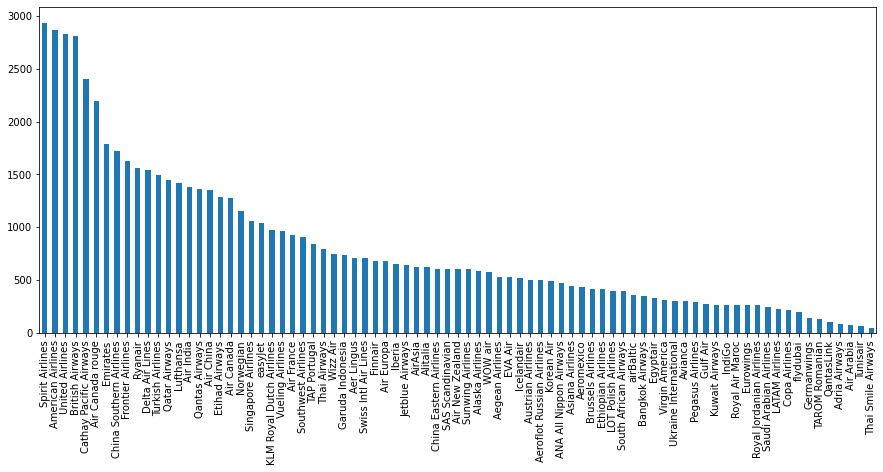

In [ ]:
main_df['airline'].value_counts().plot(kind='bar',figsize=(15,6))

We can do one hot incoding to these categorical values

**Cabin**

In [ ]:
main_df['cabin'].value_counts()

Economy Class      48558
Business Class     10326
Premium Economy     2799
First Class         1620
Name: cabin, dtype: int64

**Travel Type**

In [ ]:
main_df['traveller_type'].value_counts()

Solo Leisure      14798
Couple Leisure    10285
Family Leisure     7583
Business           7089
Name: traveller_type, dtype: int64

customer review

In [ ]:
main_df['customer_review'][70]

"âœ… Trip Verified | Istanbul to London. This airline is running a baggage scam. Be very aware. On their website they claim to allow free 2 bags (check in up to 32 kilos each) . When you arrive at counter , they don't speak English and keep telling you are not allowed any bags and must pay for it. They leave you with no option. I had to pay $400 dollars for my two bags , weighing 20 mg each. Avoid this airline like the plague. They do not speak English and are scamming people with this whole luggage scam. It's basically some sort of legalized robbery."